In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib as mpl
X, y  = make_moons (n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Out of bag evaulation
ofb_bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500,
                                bootstrap=True,
                                oob_score=True,
                                random_state=42)
ofb_bag_clf.fit(X_train,y_train)
y_predict=ofb_bag_clf.predict(X_test)
print(ofb_bag_clf.oob_score_)       # Cross validation accuracy for the remaining data out of bagging                     
print(accuracy_score(y_test,y_predict)) # 91.2% accuracy
print(ofb_bag_clf.oob_decision_function_) # oob evaluation estimates

In [ ]:
# Random Patch method
randPatch_bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500,
                                bootstrap=True,
                                bootstrap_features=True,
                                max_features = 0.6,
                                random_state=42)
randPatch_bag_clf.fit(X_train,y_train)
y_predict=randPatch_bag_clf.predict(X_test)                 
print(accuracy_score(y_test,y_predict)) # 83.2% accuracy


0.832


In [ ]:
# Random Subspaces
randSub_bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500,
                                bootstrap=True,
                                bootstrap_features=False,
                                max_features = 0.6,
                                random_state=42)
randSub_bag_clf.fit(X_train,y_train)
y_predict=randSub_bag_clf.predict(X_test)                 
print(accuracy_score(y_test,y_predict)) # 84.4% accuracy

0.84


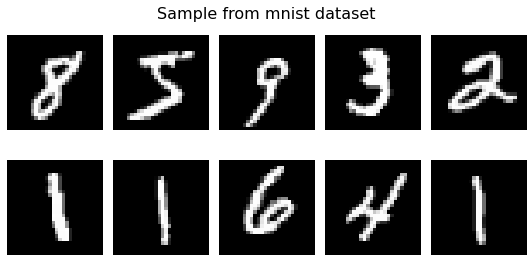

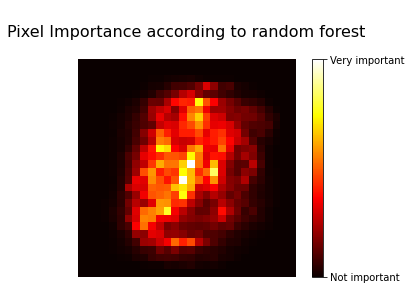

In [ ]:
from sklearn.datasets import fetch_openml

# Feature Importance
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
mnist.target
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

num = np.random.choice(20, size=10, replace=False)
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
j=0
for i,j in enumerate(num):
  ax = axes[i//num_col, i%num_col]
  sample = mnist['data'][j]
  image = sample.reshape(28,28)
  ax.imshow(image, cmap='gray')
  ax.axis("off")

plt.suptitle("Sample from mnist dataset",fontsize=16)
plt.tight_layout()
plt.show()

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    plt.title("\nPixel Importance according to random forest\n", fontsize=16)

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()


In [ ]:
?plt.title